In [1]:
# CarPrice_Assignment

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Car Price Data

In [30]:
data= pd.read_csv('D:\\Data Sets Practice\\CarPrice_Assignment.csv')

In [31]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
data= data[[ 'symboling', 'CarName','fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [33]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [34]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [35]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [36]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [37]:
data['drivewheel'].value_counts() 

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [38]:
data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [39]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
data.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# finding correlation between the two columns of the dataset

In [41]:
np.corrcoef(data['carlength'], data['carwidth'])[0, 1]

0.841118268481846

## Creating bin for Price value and dividing them as per the value in High, Mid Low

In [42]:
data['bins'] = pd.cut(x=data['price'], bins = [0,10000,20000,40000,50000])

In [43]:
data['bins'].value_counts()

(0, 10000]        100
(10000, 20000]     79
(20000, 40000]     23
(40000, 50000]      3
Name: bins, dtype: int64

In [44]:
data['bins']= data['bins'].astype(str)

In [45]:
#creating bins
#data['col']= data['col'].replace([old value],[new value])

data['bins'] = data['bins'].replace(['(0, 10000]','(10000, 20000]',
                                     '(20000, 40000]','(40000, 50000]'],['Low','Budget','Medium','Highend'])

In [46]:
data['bins'].value_counts()

Low        100
Budget      79
Medium      23
Highend      3
Name: bins, dtype: int64

In [47]:
data.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,bins
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Budget
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Budget
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Budget
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Budget
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Budget


In [48]:
# import pandas as pd
# from sklearn.preprocessing import LabelBinarizer

# jobs_encoder = LabelBinarizer()
# jobs_encoder.fit(data['fueltype'])
# transformed = jobs_encoder.transform(data['fueltype'])
# ohe_df = pd.DataFrame(transformed)
# data = pd.concat([data, ohe_df], axis=1).drop(['fueltype'], axis=1)

In [49]:
data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [50]:
# sns.pairplot(data)

In [51]:
len(data)

205

In [52]:
data.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,bins
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Budget
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Budget
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Budget
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Budget
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Budget


In [53]:
data.dtypes

symboling             int64
fueltype             object
CompanyName          object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
bins                 object
dtype: object

In [54]:
data.columns

Index(['symboling', 'fueltype', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'bins'],
      dtype='object')

# Creating dummies for the categorical columns

In [56]:
# data = pd.get_dummies(data, columns = ['CompanyName'])
# data = pd.get_dummies(data, columns = ['fueltype'])
# data = pd.get_dummies(data, columns = ['aspiration'])
# data = pd.get_dummies(data, columns = ['doornumber'])
# data = pd.get_dummies(data, columns = ['carbody'])
# data = pd.get_dummies(data, columns = ['drivewheel'])
# data = pd.get_dummies(data, columns = ['enginelocation'])
# data = pd.get_dummies(data, columns = ['enginetype'])
# data = pd.get_dummies(data, columns = ['cylindernumber'])
# data = pd.get_dummies(data, columns = ['fuelsystem'])
# data = pd.get_dummies(data, columns = ['bins'])

# Scaling the features using MinMaxScaler

In [57]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
scaler = MinMaxScaler()
scaler.fit_transform(data)

data[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']]= scaler.fit_transform(data[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']])

In [58]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,bins_Budget,bins_Highend,bins_Low,bins_Medium
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0


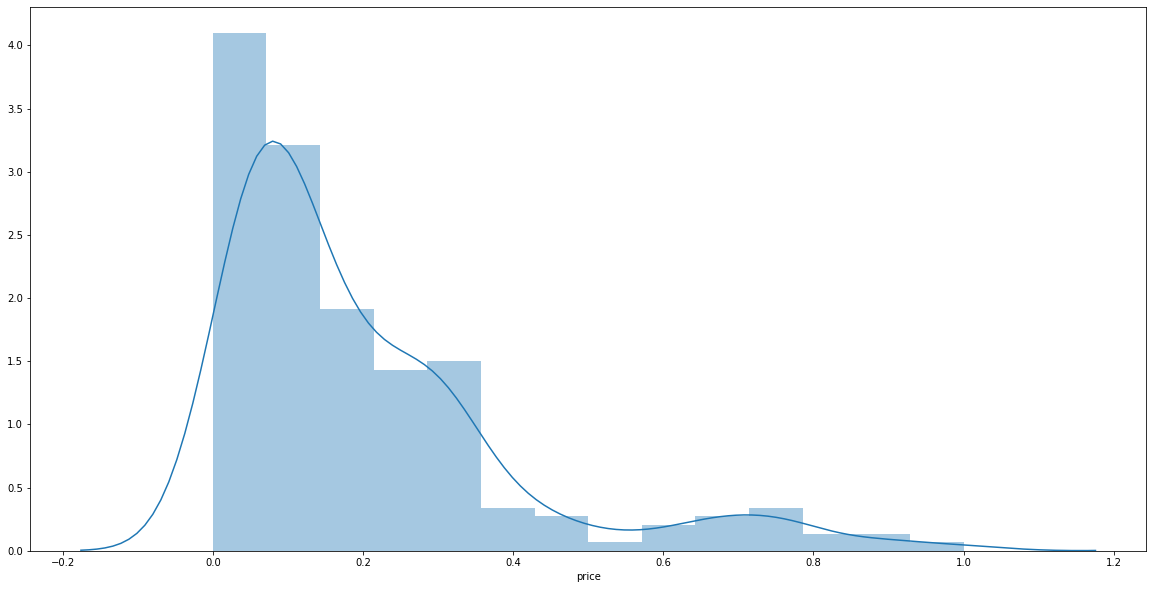

In [59]:
plt.figure(figsize = (20,10))
sns.distplot(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x233b14c8788>,
 'caps': [<matplotlib.lines.Line2D at 0x233b14c8e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x233b14c0f08>],
 'medians': [<matplotlib.lines.Line2D at 0x233b14cfd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x233b14cfe88>],
 'means': []}

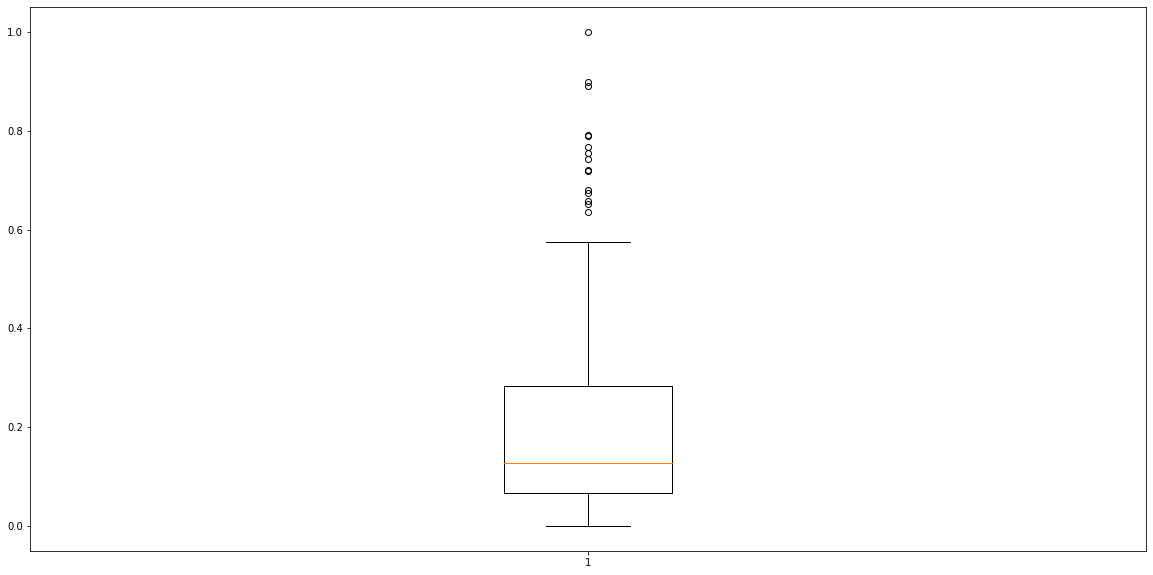

In [60]:
plt.figure(figsize = (20,10))
plt.boxplot(data['price'])

# Using IQR and removing the outliers

In [61]:
#Finding the IQR value for the dataframe
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

symboling          0.400000
wheelbase          0.230321
carlength          0.250746
carwidth           0.233333
carheight          0.291667
                     ...   
fuelsystem_spfi    0.000000
bins_Budget        1.000000
bins_Highend       0.000000
bins_Low           1.000000
bins_Medium        0.000000
Length: 85, dtype: float64


In [68]:
# #Removing those data points lying out of the IQR range


# data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data_out.shape #This shows the shape of the dataframe after removing outliers

In [69]:
data_out= data

In [70]:
data_out.dropna(axis=0, inplace= True)

In [71]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    float64
 1   wheelbase                205 non-null    float64
 2   carlength                205 non-null    float64
 3   carwidth                 205 non-null    float64
 4   carheight                205 non-null    float64
 5   curbweight               205 non-null    float64
 6   enginesize               205 non-null    float64
 7   boreratio                205 non-null    float64
 8   stroke                   205 non-null    float64
 9   compressionratio         205 non-null    float64
 10  horsepower               205 non-null    float64
 11  peakrpm                  205 non-null    float64
 12  citympg                  205 non-null    float64
 13  highwaympg               205 non-null    float64
 14  price                    2

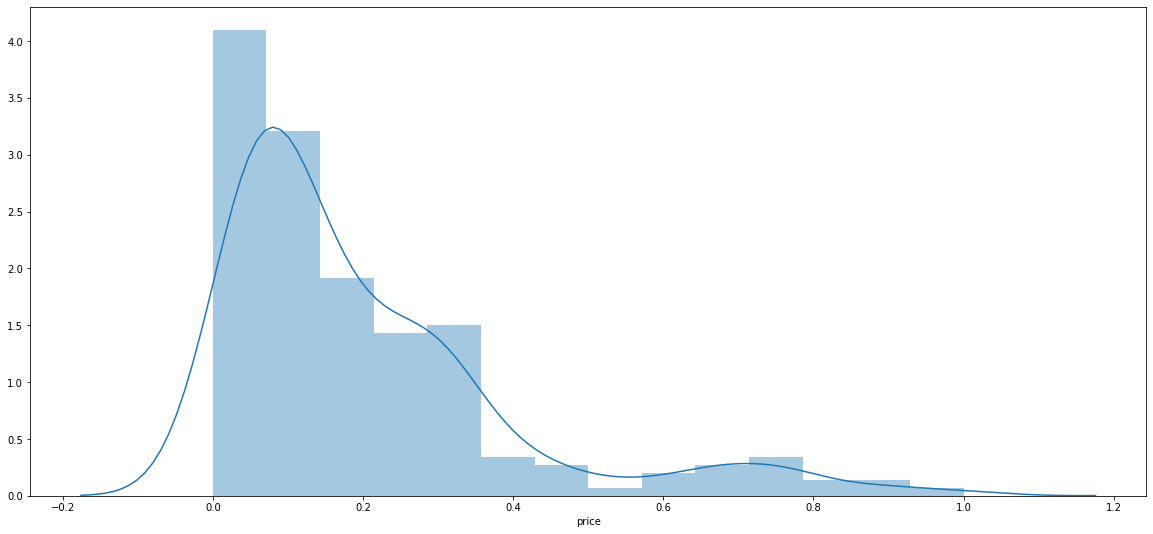

In [72]:
plt.figure(figsize=(20,9))
sns.distplot(data_out['price'])

# Splitting the Data as per the training and testing

In [99]:
train= data_out.iloc[:175,]
test= data_out.iloc[175:,]

train_x=train[['carlength', 'carwidth', 'curbweight', 'enginesize',
       'stroke', 'peakrpm',
        'carbody_sedan',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four']]
train_y= train[ 'price']


test_x= test[['carlength', 'carwidth', 'curbweight', 'enginesize',
       'stroke', 'peakrpm',
        'carbody_sedan',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four']]
test_y= test[ 'price']

# Using Statsmodel 

In [100]:
#Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, 
#as well as for conducting statistical tests and exploring the data

# lr = smf.ols(formula='sales ~ TV + radio + newspaper', data=df)
# fitted_model = lr.fit()
# fitted_model.summary()

In [101]:
X_train1= train_x
X_sm2= sm.add_constant(X_train1) #we need to add constant for the intercept
slm2= sm.OLS(train_y,X_sm2).fit()
print(slm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     197.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           3.41e-93
Time:                        11:41:58   Log-Likelihood:                 279.80
No. Observations:                 175   AIC:                            -529.6
Df Residuals:                     160   BIC:                            -482.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0364 

# Using variance influence factor 

In [102]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#Calculating the Variance Inflation Factor
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# checkVIF(train_x)

In [103]:
#Calculating the Variance Inflation Factor

#Drop those columns having high variance inflation factor showing High Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

checkVIF(train_x)

,Features,VIF
2,curbweight,65.70
0,carlength,52.42
1,carwidth,51.01
3,enginesize,26.78
4,stroke,19.24
13,cylindernumber_four,8.91
9,enginetype_ohc,7.93
5,peakrpm,5.47
10,enginetype_ohcv,2.74
12,cylindernumber_five,2.63


# Using Linear Regression model

In [104]:
lm= LinearRegression()
lm.fit(train_x,train_y)
predict= lm.predict(train_x)
future= lm.predict(test_x)
print(lm.coef_,lm.intercept_)

[-0.14076077  0.18665059  0.41189765  0.58656687 -0.1989501   0.11896088
  0.02460888  0.17336463 -0.3363656   0.0519438  -0.24949105  0.24496882
 -0.10415735 -0.17258702] 0.03637206260998682


In [105]:
rmse= mean_squared_error(predict,train_y)
r2= r2_score(predict,train_y)
print(rmse)
print(r2)

0.002392117870316649
0.9421947565040392


In [106]:
rmse1= mean_squared_error(future,test_y)
r21= r2_score(future,test_y)
print(rmse1)
print(r21)

0.008813977118874416
0.5987025554669896


# Plotting the Actual and Predicted

Text(0, 0.5, 'Sales')

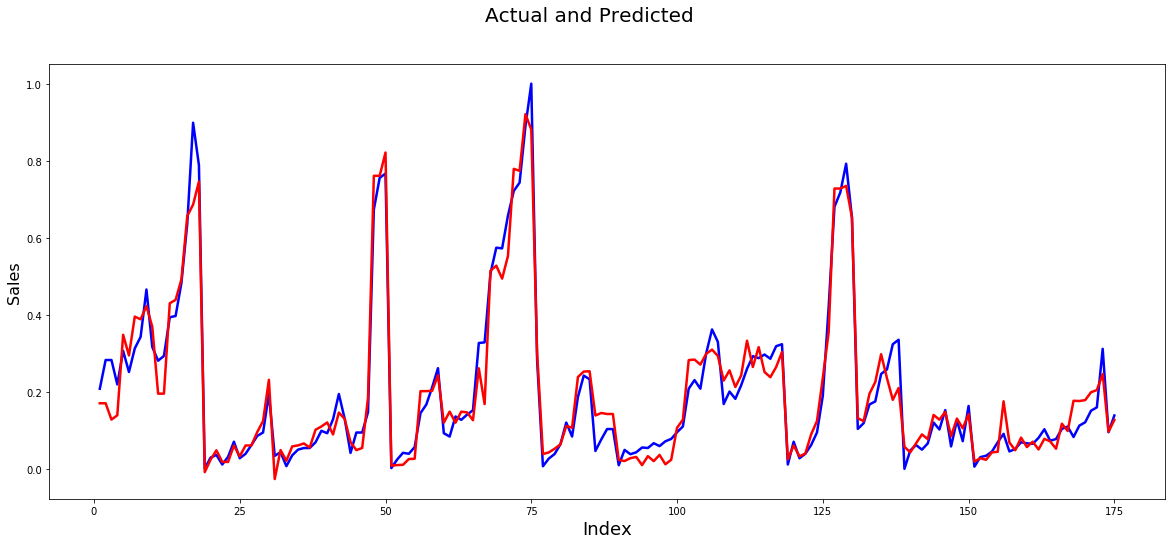

In [107]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,176,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,train_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'Sales')

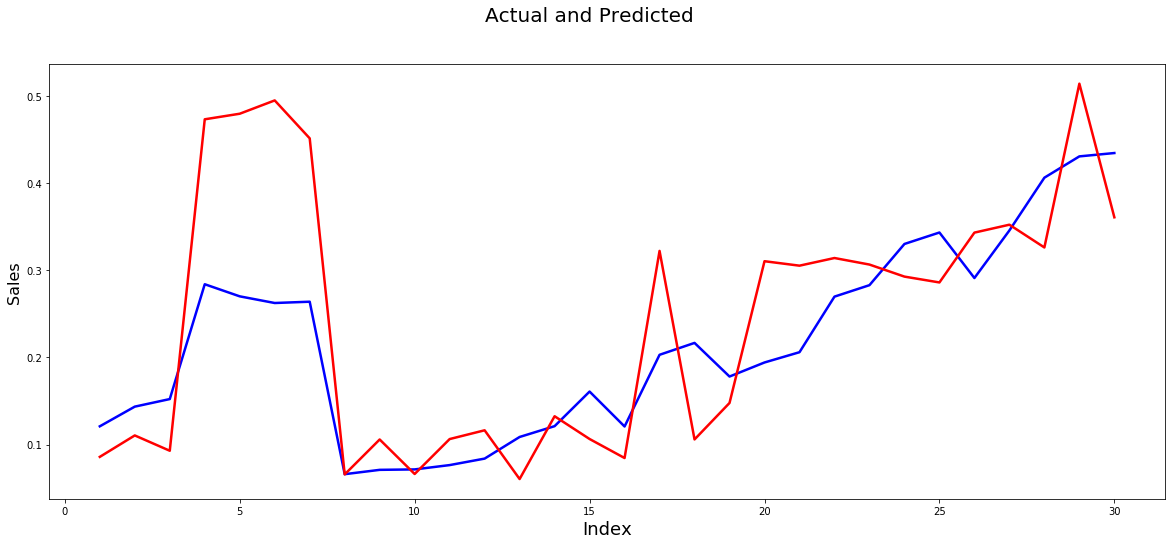

In [108]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,31,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,future, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

# Using RFE for feature selection

In [109]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
# regressor = LinearRegressor(n_estimators=100, max_depth=10)

In [110]:
from sklearn.feature_selection import RFE

In [111]:
selector = RFE(estimator, n_features_to_select=20, step=1)
selector.fit(train_x, train_y)

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='scale', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=20, step=1, verbose=0)

In [112]:
>>> selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [113]:
#x_columns.columns[selector.support_]: shows the columns as per their priority number

train_x.columns[selector.support_]

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'peakrpm', 'carbody_sedan', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four'],
      dtype='object')

In [114]:
>>> selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
# now print out the features in order of ranking

from operator import itemgetter
features = train_x.columns.to_list()
for x, y in (sorted(zip(selector.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 carlength
1 carwidth
1 curbweight
1 enginesize
1 stroke
1 peakrpm
1 carbody_sedan
1 enginelocation_rear
1 enginetype_dohcv
1 enginetype_ohc
1 enginetype_ohcv
1 cylindernumber_eight
1 cylindernumber_five
1 cylindernumber_four


In [116]:

#===========================================================================
# use the model to predict the prices for the test data
#===========================================================================
predictions =selector.predict(test_x)

In [117]:
predictions

array([0.15031505, 0.15755543, 0.15540531, 0.49795486, 0.50258238,
       0.51244786, 0.49023037, 0.10588452, 0.13111015, 0.10623159,
       0.13145721, 0.13874555, 0.10559952, 0.14746682, 0.10988812,
       0.10877099, 0.32869349, 0.15879292, 0.19605308, 0.32265221,
       0.32952574, 0.32531303, 0.33045125, 0.31202383, 0.31774049,
       0.3472106 , 0.35492828, 0.35608479, 0.53731223, 0.35993626])